# Lab | Unit 4 | Cleaning and comparing regression models


### Context 
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Objectives:

Retain customers, Analyze relevant customer data, Develop focused customer retention programs. Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in ('files_for_lab') folder. In this lab we will explore categorical data.

## Instructions

Import the necessary libraries if you are starting a new notebook.

In [1]:
# Pandas functions
import pandas as pd
# Numpy functions
import numpy as np
# Math functions
import math
# Matplot
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Remove warning errors
import warnings
warnings.filterwarnings('ignore')
# Scipy Stats
import scipy.stats as st
# Cell-to-cell script
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
# Get the data 

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

First look at its main features (head, shape, info).


In [3]:
# Check the data

customer_df.describe().T

customer_df.shape

customer_df.info()

customer_df.head()

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Rename the columns so they follow the PE8 (snake case).

In [4]:
# Renaming columns with .replace function

customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns = customer_df.columns.str.replace('EmploymentStatus','Employment_Status')

Check for outliers through visualization

Text(0.5, 0.98, 'Distribution of variables in violinplots')

<AxesSubplot:xlabel='Customer_Lifetime_Value'>

<AxesSubplot:xlabel='Income'>

<AxesSubplot:xlabel='Total_Claim_Amount'>

<AxesSubplot:xlabel='Monthly_Premium_Auto'>

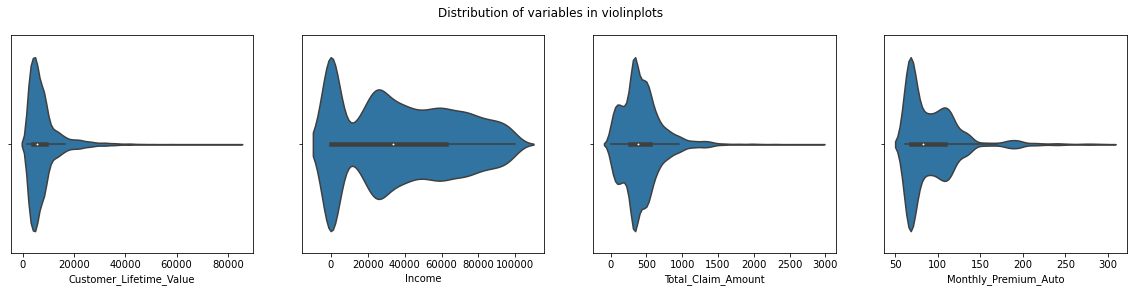

In [5]:
# Checking distribution through ViolinPlot

fig, axes = plt.subplots(1,4,  figsize=(20, 4))

fig.suptitle('Distribution of variables in violinplots')

sns.violinplot(ax=axes[0],data= customer_df, x= 'Customer_Lifetime_Value')
sns.violinplot(ax=axes[1],data= customer_df, x= 'Income')
sns.violinplot(ax=axes[2],data= customer_df, x= 'Total_Claim_Amount')
sns.violinplot(ax=axes[3],data= customer_df, x= 'Monthly_Premium_Auto')

Removing outliers

In [6]:
# Removing outliers in between 1st and 3rd quartile*1.5

iqr = np.percentile(customer_df['Customer_Lifetime_Value'],80) - np.percentile(customer_df['Customer_Lifetime_Value'],20)
upper_limit = np.percentile(customer_df['Customer_Lifetime_Value'],80) + 1.5*iqr
customer_df = customer_df[customer_df['Customer_Lifetime_Value'] < upper_limit]

iqr = np.percentile(customer_df['Total_Claim_Amount'],90) - np.percentile(customer_df['Total_Claim_Amount'],20)
upper_limit = np.percentile(customer_df['Total_Claim_Amount'],90) + 1.5*iqr
customer_df = customer_df[customer_df['Total_Claim_Amount'] < upper_limit]

iqr = np.percentile(customer_df['Income'],85) - np.percentile(customer_df['Income'],20)
upper_limit = np.percentile(customer_df['Income'],85) + 1.5*iqr
customer_df = customer_df[customer_df['Income'] < upper_limit]

iqr = np.percentile(customer_df['Monthly_Premium_Auto'],90) - np.percentile(customer_df['Monthly_Premium_Auto'],20)
upper_limit = np.percentile(customer_df['Monthly_Premium_Auto'],90) + 1.5*iqr
customer_df = customer_df[customer_df['Monthly_Premium_Auto'] < upper_limit]

Check for new distribution through visualization

Text(0.5, 0.98, 'Distribution of variables in violinplots')

<AxesSubplot:xlabel='Customer_Lifetime_Value'>

<AxesSubplot:xlabel='Income'>

<AxesSubplot:xlabel='Total_Claim_Amount'>

<AxesSubplot:xlabel='Monthly_Premium_Auto'>

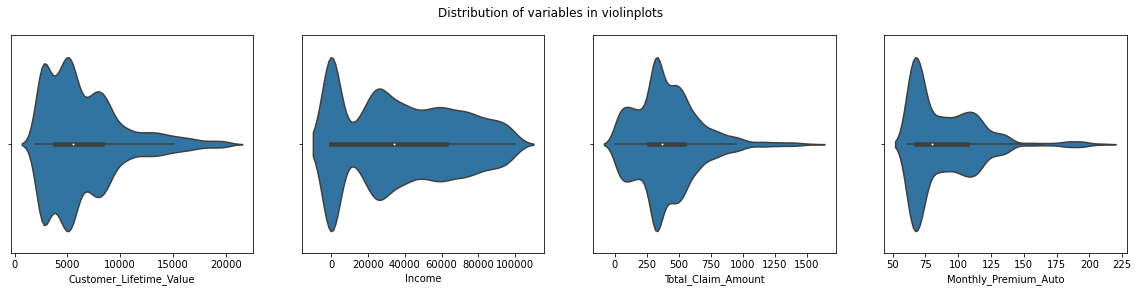

In [7]:
# Plotting new distribution through ViolinPlot

fig, axes = plt.subplots(1,4,  figsize=(20, 4))

fig.suptitle('Distribution of variables in violinplots')

sns.violinplot(ax=axes[0],data= customer_df, x= 'Customer_Lifetime_Value')
sns.violinplot(ax=axes[1],data= customer_df, x= 'Income')
sns.violinplot(ax=axes[2],data= customer_df, x= 'Total_Claim_Amount')
sns.violinplot(ax=axes[3],data= customer_df, x= 'Monthly_Premium_Auto')

Change effective to date column to datetime format.

In [8]:
# Change ['Effective_To_Date'] from numeric to datetime format

customer_df['Effective_To_Date']= pd.to_datetime(customer_df['Effective_To_Date'])

Check NaN values per column.

In [9]:
# Check nulls and return True if found

customer_df.isnull().sum() != 0

Customer                         False
State                            False
Customer_Lifetime_Value          False
Response                         False
Coverage                         False
Education                        False
Effective_To_Date                False
Employment_Status                False
Gender                           False
Income                           False
Location_Code                    False
Marital_Status                   False
Monthly_Premium_Auto             False
Months_Since_Last_Claim          False
Months_Since_Policy_Inception    False
Number_of_Open_Complaints        False
Number_of_Policies               False
Policy_Type                      False
Policy                           False
Renew_Offer_Type                 False
Sales_Channel                    False
Total_Claim_Amount               False
Vehicle_Class                    False
Vehicle_Size                     False
dtype: bool

For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

Get categorical features.

In [10]:
# Create a DataFrame with categarical values selecting through objects data type.

categorical_df = customer_df.select_dtypes(include=['object'])
categorical_df

,Customer,State,Response,Coverage,Education,Employment_Status,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


What should we do with the customer_id column?

In [11]:
# We may drop it as the number of unique values matches the number of rows.

customer_df['Customer'].nunique

<bound method IndexOpsMixin.nunique of 0       BU79786
1       QZ44356
2       AI49188
3       WW63253
4       HB64268
         ...   
9128    YM19146
9130    PK87824
9131    TD14365
9132    UP19263
9133    Y167826
Name: Customer, Length: 8461, dtype: object>

In [12]:
# Drop the column ['Customer'] as it overlaps index info.

customer_df = customer_df.drop(['Customer'], axis=1)

Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [13]:
# Changing type of Income to float to store into continuous_df
customer_df['Income'] = customer_df['Income'].astype(float)

# Select the continuous_df from float type
continuous_df = customer_df.select_dtypes(include=['float64'])

# Select discrete_df from integers type
discrete_df = customer_df.select_dtypes(include=['int64'])

Plot a correlation matrix, what can you see?

In [14]:
# Concatenating continuous and discrete dataframe

X = pd.concat([continuous_df, discrete_df], axis=1)

In [15]:
# Standard Scaling to run correlation matrix

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
X_scaled.head()

,Customer_Lifetime_Value,Income,Total_Claim_Amount,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
0,-1.019846,0.608386,-0.111371,-0.743901,1.686079,-1.540878,-0.423972,-0.827124
1,0.112614,-1.238480,2.871183,0.157096,-0.204408,-0.215378,-0.423972,2.034495
2,1.699528,0.362012,0.614285,0.661654,0.293088,-0.358675,-0.423972,-0.418321
3,0.291595,-1.238480,0.468121,0.589574,0.293088,0.608582,-0.423972,1.625692
4,-1.006369,0.200181,-1.096750,-0.599742,-0.303907,-0.143729,-0.423972,-0.827124


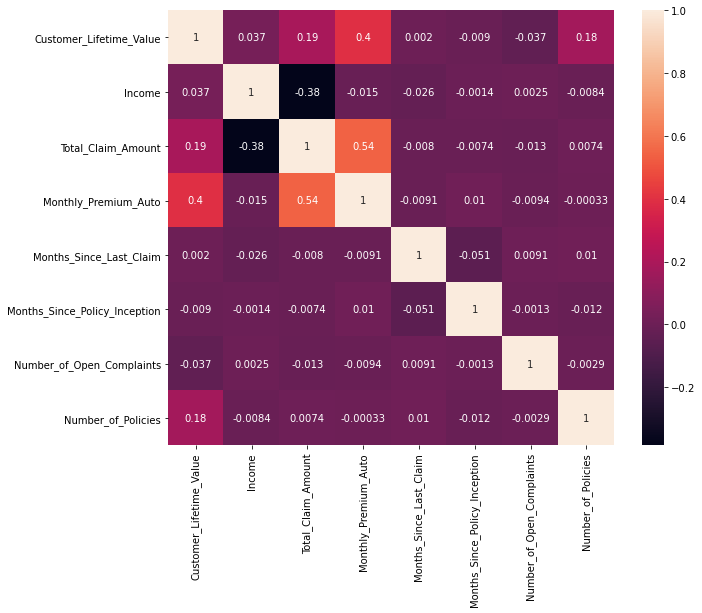

,Customer_Lifetime_Value,Income,Total_Claim_Amount,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
Customer_Lifetime_Value,1.000000,0.037032,0.189479,0.398271,0.001952,-0.009032,-0.037076,0.176657
Income,0.037032,1.000000,-0.384937,-0.015493,-0.025815,-0.001352,0.002465,-0.008370
Total_Claim_Amount,0.189479,-0.384937,1.000000,0.542791,-0.008003,-0.007442,-0.013326,0.007392
Monthly_Premium_Auto,0.398271,-0.015493,0.542791,1.000000,-0.009145,0.010185,-0.009388,-0.000333
Months_Since_Last_Claim,0.001952,-0.025815,-0.008003,-0.009145,1.000000,-0.050973,0.009118,0.010323
Months_Since_Policy_Inception,-0.009032,-0.001352,-0.007442,0.010185,-0.050973,1.000000,-0.001323,-0.011925
Number_of_Open_Complaints,-0.037076,0.002465,-0.013326,-0.009388,0.009118,-0.001323,1.000000,-0.002882
Number_of_Policies,0.176657,-0.008370,0.007392,-0.000333,0.010323,-0.011925,-0.002882,1.000000


In [16]:
# Check correlation between numerical values through correlation matrix and Seaborn Heatmap

corr_matrix=X_scaled.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
corr_matrix

# As an acceptable score of correlation is 0.65-0.70 the correlation doesn't show any strong correlation between values.

Create a function to plot every discrete variables. 
Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

<AxesSubplot:xlabel='Monthly_Premium_Auto', ylabel='Density'>

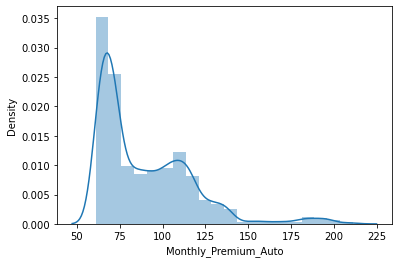

<AxesSubplot:xlabel='Months_Since_Last_Claim', ylabel='Density'>

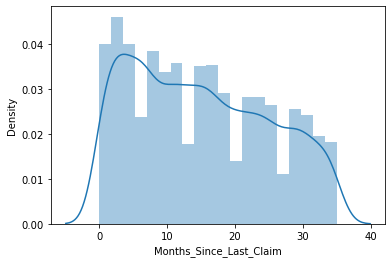

<AxesSubplot:xlabel='Months_Since_Policy_Inception', ylabel='Density'>

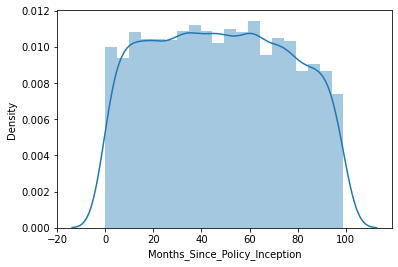

<AxesSubplot:xlabel='Number_of_Open_Complaints', ylabel='Density'>

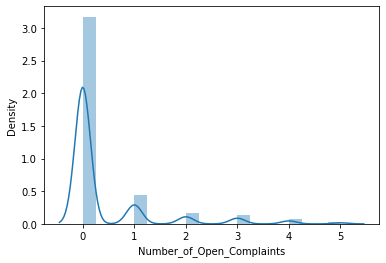

<AxesSubplot:xlabel='Number_of_Policies', ylabel='Density'>

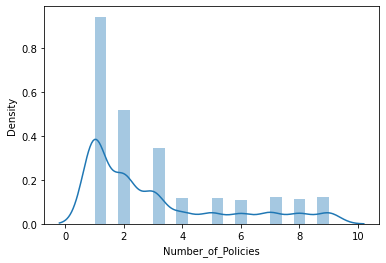

In [17]:
# Check normal distribution through DistPlot 

for i in range(len(discrete_df.columns)):
    sns.distplot(discrete_df.iloc[:,i],bins=20)
    plt.show()

Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.


<AxesSubplot:xlabel='Customer_Lifetime_Value'>

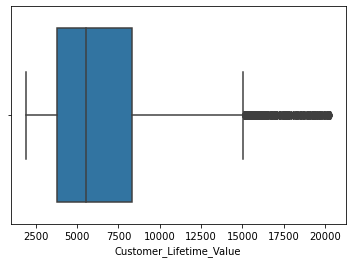

<AxesSubplot:xlabel='Income'>

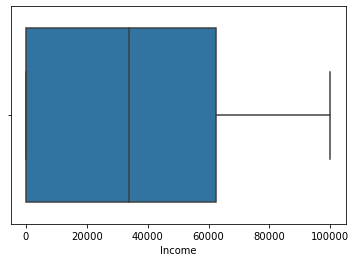

<AxesSubplot:xlabel='Total_Claim_Amount'>

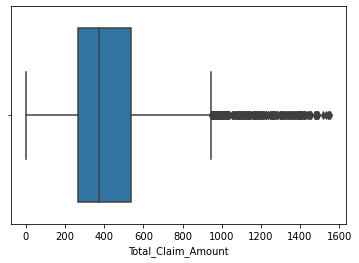

In [18]:
# Check outliers with BoxPlot: head and tail will inform of the potential presence of outliers

for i in range(len(continuous_df.columns)):
    sns.boxplot(continuous_df.iloc[:,i])
    plt.show()

Check nan values per column.

In [19]:
# Check the NaN values

continuous_df.isna().sum()
discrete_df.isna().sum()
categorical_df.isna().sum()

Customer_Lifetime_Value    0
Income                     0
Total_Claim_Amount         0
dtype: int64

Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
dtype: int64

Customer             0
State                0
Response             0
Coverage             0
Education            0
Employment_Status    0
Gender               0
Location_Code        0
Marital_Status       0
Policy_Type          0
Policy               0
Renew_Offer_Type     0
Sales_Channel        0
Vehicle_Class        0
Vehicle_Size         0
dtype: int64

Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [20]:
# Check uniques to split numerical (very high number of unique + float values = continuous)

X.dtypes
X.nunique()

Customer_Lifetime_Value          float64
Income                           float64
Total_Claim_Amount               float64
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
dtype: object

Customer_Lifetime_Value          7459
Income                           5299
Total_Claim_Amount               4702
Monthly_Premium_Auto              144
Months_Since_Last_Claim            36
Months_Since_Policy_Inception     100
Number_of_Open_Complaints           6
Number_of_Policies                  9
dtype: int64

In [21]:
# Function to differentiate continuous from discrete based on the frequency of unique values.

def discrete_from_continuous(x):
    if len(x.value_counts()) > 1000:
        return 'Continuous values'
    else:
        return 'Discrete values'

X.apply(discrete_from_continuous)

Customer_Lifetime_Value          Continuous values
Income                           Continuous values
Total_Claim_Amount               Continuous values
Monthly_Premium_Auto               Discrete values
Months_Since_Last_Claim            Discrete values
Months_Since_Policy_Inception      Discrete values
Number_of_Open_Complaints          Discrete values
Number_of_Policies                 Discrete values
dtype: object

Open the categoricals variable we created before.




In [22]:
# Check categorical_df

categorical_df.head()

,Customer,State,Response,Coverage,Education,Employment_Status,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Plot all the categorical variables with the proper plot. What can you see?


In [23]:
# Drop 'Customer' because overlapping index (Total number of rows = Total Customer)

categorical_df = categorical_df.drop(['Customer'], axis=1)

<AxesSubplot:xlabel='State', ylabel='count'>

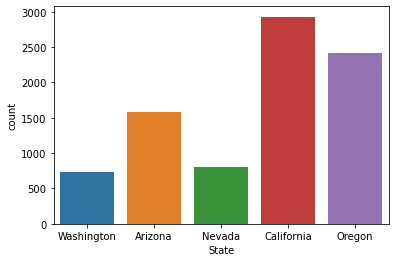

<AxesSubplot:xlabel='Response', ylabel='count'>

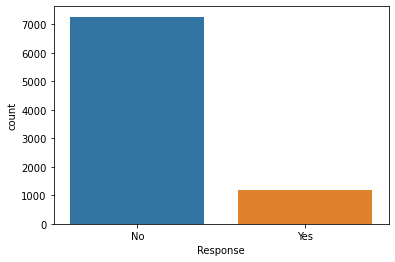

<AxesSubplot:xlabel='Coverage', ylabel='count'>

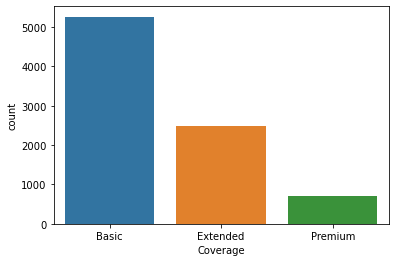

<AxesSubplot:xlabel='Education', ylabel='count'>

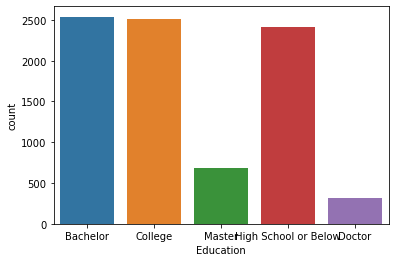

<AxesSubplot:xlabel='Employment_Status', ylabel='count'>

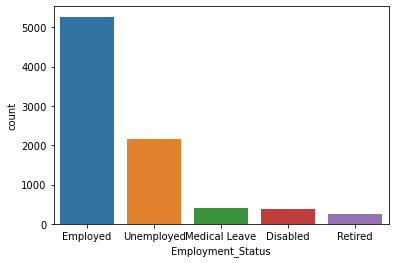

<AxesSubplot:xlabel='Gender', ylabel='count'>

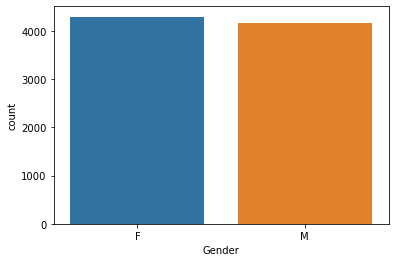

<AxesSubplot:xlabel='Location_Code', ylabel='count'>

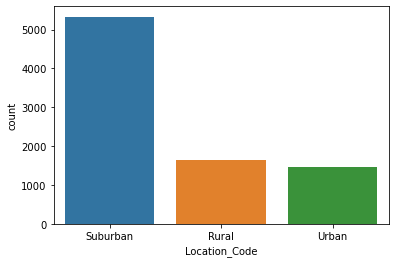

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

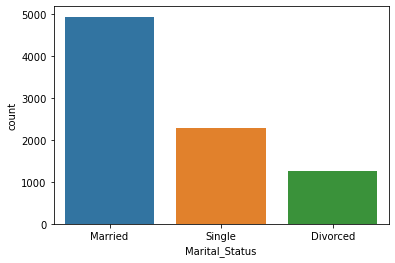

<AxesSubplot:xlabel='Policy_Type', ylabel='count'>

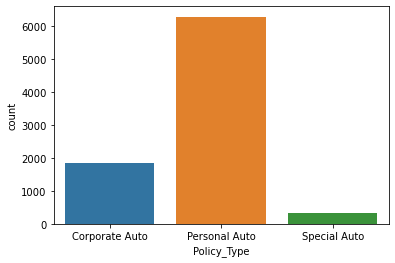

<AxesSubplot:xlabel='Policy', ylabel='count'>

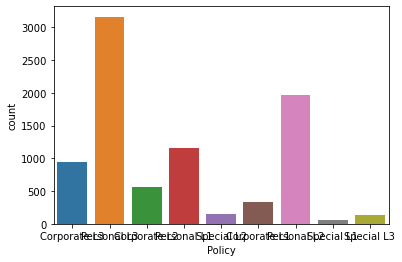

<AxesSubplot:xlabel='Renew_Offer_Type', ylabel='count'>

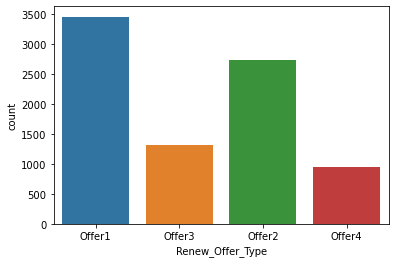

<AxesSubplot:xlabel='Sales_Channel', ylabel='count'>

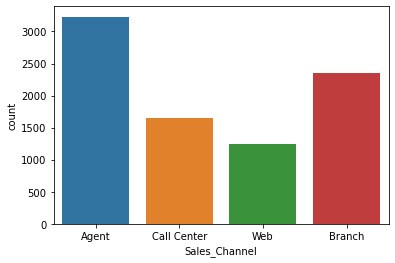

<AxesSubplot:xlabel='Vehicle_Class', ylabel='count'>

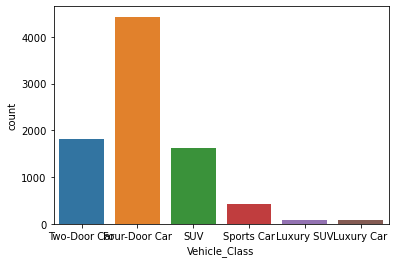

<AxesSubplot:xlabel='Vehicle_Size', ylabel='count'>

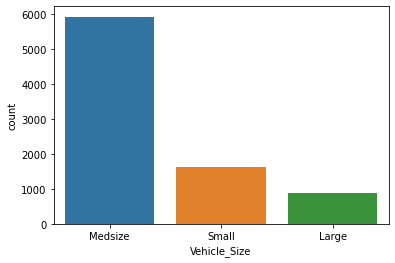

In [24]:
# In-line plot the categorical through Seaborn CountPlot

for i in range(len(categorical_df.columns)):
        sns.countplot(categorical_df.iloc[:,i])
        plt.show()

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


In [25]:
# Iterating Chi-Square contingency between all categorical values

col1=[]
col2=[]
P_value=[]

for i in range(len(categorical_df.columns)-1):
    for e in range(len(categorical_df.columns)):
        cross = pd.crosstab(categorical_df[categorical_df.columns[i]], categorical_df[categorical_df.columns[e]], margins = False)
        P =st.chi2_contingency(cross)
        col1.append(categorical_df.columns[i])
        col2.append(categorical_df.columns[e])
        P_value.append(P[1]) 

In [26]:
# Building Dataframe with dependent and independent variables 

col1=pd.DataFrame(col1)
col2=pd.DataFrame(col2)
P_value=pd.DataFrame(P_value)

P_values_df = pd.concat((col1, col2, P_value),axis=1)
P_values_df.columns = ['Column 1', 'Column 2', 'P_value']
P_values_df

,Column 1,Column 2,P_value
0,State,State,0.000000e+00
1,State,Response,9.856402e-01
2,State,Coverage,8.217325e-01
3,State,Education,7.909300e-01
4,State,Employment_Status,9.970620e-01
...,...,...,...
177,Vehicle_Class,Policy,7.088620e-01
178,Vehicle_Class,Renew_Offer_Type,9.777564e-18
179,Vehicle_Class,Sales_Channel,5.049970e-02
180,Vehicle_Class,Vehicle_Class,0.000000e+00


In [27]:
# Checking for correlation between categoricals

low_P_values=P_values_df[(P_values_df['P_value'] <= 0.05) & (P_values_df['Column 1'] != P_values_df['Column 2'])]
# pd.set_option("display.max_rows", None, "display.max_columns", None)
low_P_values['P_value'] = low_P_values['P_value'].drop_duplicates()
low_P_values = low_P_values.dropna()
low_P_values

nb_of_dependent_categories = pd.DataFrame(low_P_values['Column 2'].value_counts())
nb_of_dependent_categories.columns = ['Nb of Dependent Categories']
nb_of_dependent_categories

,Column 1,Column 2,P_value
9,State,Policy,6.387844e-04
17,Response,Education,1.625540e-03
18,Response,Employment_Status,5.944562e-168
20,Response,Location_Code,8.654781e-23
21,Response,Marital_Status,2.277851e-19
24,Response,Renew_Offer_Type,1.406061e-114
25,Response,Sales_Channel,3.981100e-21
26,Response,Vehicle_Class,5.483865e-07
27,Response,Vehicle_Size,1.161353e-05
31,Coverage,Education,1.716484e-02


,Nb of Dependent Categories
Vehicle_Class,7
Renew_Offer_Type,7
Location_Code,6
Sales_Channel,5
Vehicle_Size,5
Marital_Status,4
Employment_Status,3
Education,3
Response,3
Coverage,2


In [28]:
# Based on our crossed observation (EDA, countplot & P_value) we choose to drop 3 columns

# Gender: On the visualization (CountPlot) we can observe that almost half of the customer is from a different gender; won't bring new information.
# Education: Can be guessed crossing information through table (P_value)
# Response: On classic observation (EDA) will be likely that 'No' customer have will 0 Number Of Open Complaints.

categorical_df.drop(['Gender', 'Education','Response'], axis=1)

,State,Coverage,Employment_Status,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,Basic,Employed,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,Unemployed,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,Employed,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...
9128,California,Premium,Employed,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,California,Extended,Employed,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,Extended,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,Extended,Employed,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Plot time variable. Can you extract something from it?

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='Effective_To_Date', ylabel='Total_Claim_Amount'>

(array([14975., 14982., 14989., 14996., 15006., 15013., 15020., 15027.,
        15034.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Total Claim Amount per Date')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total Claim Amount')

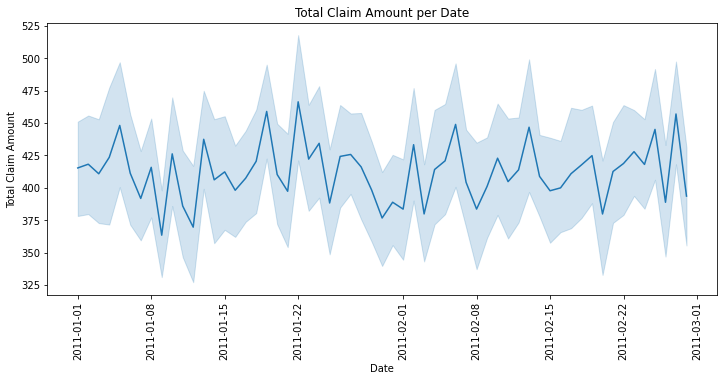

In [29]:
# Plotting Total Claim Amount on a timeline

plt.figure(figsize = (12,5))
sns.lineplot('Effective_To_Date','Total_Claim_Amount',data=customer_df)
plt.xticks(rotation=90)
plt.title('Total Claim Amount per Date')
plt.xlabel('Date')
plt.ylabel('Total Claim Amount')
plt.show()



### Instructions

So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

Create a copy of the dataframe for the data wrangling.

In [30]:
# Create a copy of customer_df in customer_df2

customer_df2 = customer_df.copy()
customer_df2

,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,Employment_Status,Gender,Income,Location_Code,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761.0,Suburban,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604.0,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0.0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941.0,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Encode the categorical variables

In [31]:
# OneHot Encode categorical values through Pandas dummies

onehot = categorical_df[['State','Marital_Status','Policy_Type','Policy','Renew_Offer_Type','Sales_Channel','Vehicle_Class']]
onehotencoded = pd.get_dummies(onehot, drop_first=True)
onehotencoded

,State_California,State_Nevada,State_Oregon,State_Washington,Marital_Status_Married,Marital_Status_Single,Policy_Type_Personal Auto,Policy_Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,...,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9130,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9131,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9132,1,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0


The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [32]:
# We add column ['Effective_To_Date'] to discrete_df removing year of subscription

customer_df2['Effective_To_Date'] = pd.to_datetime(customer_df2['Effective_To_Date'])
customer_df2['Effective_To_Date'] = customer_df2['Effective_To_Date'].dt.strftime('%d%m')
customer_df2['Effective_To_Date'] = pd.to_numeric(customer_df2['Effective_To_Date'])
discrete_df['Effective_To_Date'] = customer_df2['Effective_To_Date'] 
discrete_df

,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Effective_To_Date
0,69,32,5,0,1,2402
1,94,13,42,0,8,3101
2,108,18,38,0,2,1902
3,106,18,65,0,7,2001
4,73,12,44,0,1,302
...,...,...,...,...,...,...
9128,104,16,58,0,1,601
9130,79,14,28,0,1,1202
9131,85,9,37,3,2,602
9132,96,34,3,0,3,302






You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
- One hot to state
- Ordinal to coverage
- Ordinal to employmentstatus
- Ordinal to location code
- One hot to marital status
- One hot to policy type
- One hot to policy
- One hot to renew offercustomer_df
- One hot to sales channel
- One hot vehicle class
- Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
- given that column "coverage" in the dataframe "data" has three categories:
- "basic", "extended", and "premium" and values are to be represented in the same order.

In [33]:
# Ordinal encoding replacing strings by values(integers)

ordinal = categorical_df[['Coverage','Employment_Status','Location_Code','Vehicle_Size']]

ordinal["Coverage"] = ordinal["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["Employment_Status"] = ordinal["Employment_Status"].map({'Disabled': 0, 'Retired' : 1, 'Medical Leave' : 2, 'Unemployed': 3, 'Employed' : 4})
ordinal['Location_Code'] = ordinal['Location_Code'].map({'Rural' : 0, 'Suburban' : 1, 'Urban' : 2})
ordinal['Vehicle_Size'] = ordinal['Vehicle_Size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})

ordinal

,Coverage,Employment_Status,Location_Code,Vehicle_Size
0,0,4,1,1
1,1,3,1,1
2,2,4,1,1
3,0,3,1,1
4,0,4,0,1
...,...,...,...,...
9128,2,4,1,2
9130,1,4,1,1
9131,1,3,1,1
9132,1,4,1,2


In [34]:
discrete_df = discrete_df.drop(['Number_of_Open_Complaints', 'Number_of_Policies'], axis=1)

In [35]:
# Concatenating ordinal, onehotencoded, continuous_df and discrete_df DataFrame
customer_df3 = pd.concat([ordinal, onehotencoded, continuous_df, discrete_df],axis=1)

customer_df3

,Coverage,Employment_Status,Location_Code,Vehicle_Size,State_California,State_Nevada,State_Oregon,State_Washington,Marital_Status_Married,Marital_Status_Single,...,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Customer_Lifetime_Value,Income,Total_Claim_Amount,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Effective_To_Date
0,0,4,1,1,0,0,0,1,1,0,...,0,0,1,2763.519279,56274.0,384.811147,69,32,5,2402
1,1,3,1,1,0,0,0,0,0,1,...,0,0,0,6979.535903,0.0,1131.464935,94,13,42,3101
2,2,4,1,1,0,1,0,0,1,0,...,0,0,1,12887.431650,48767.0,566.472247,108,18,38,1902
3,0,3,1,1,1,0,0,0,1,0,...,1,0,0,7645.861827,0.0,529.881344,106,18,65,2001
4,0,4,0,1,0,0,0,1,0,1,...,0,0,0,2813.692575,43836.0,138.130879,73,12,44,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,2,4,1,2,1,0,0,0,0,1,...,0,0,0,4100.398533,47761.0,541.282007,104,16,58,601
9130,1,4,1,1,1,0,0,0,0,0,...,0,0,0,3096.511217,21604.0,379.200000,79,14,28,1202
9131,1,3,1,1,1,0,0,0,0,1,...,0,0,0,8163.890428,0.0,790.784983,85,9,37,602
9132,1,4,1,2,1,0,0,0,1,0,...,0,0,0,7524.442436,21941.0,691.200000,96,34,3,302


Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [36]:
# Check dtypes to see if we have only numericals tu run our model

customer_df3.dtypes

Coverage                           int64
Employment_Status                  int64
Location_Code                      int64
Vehicle_Size                       int64
State_California                   uint8
State_Nevada                       uint8
State_Oregon                       uint8
State_Washington                   uint8
Marital_Status_Married             uint8
Marital_Status_Single              uint8
Policy_Type_Personal Auto          uint8
Policy_Type_Special Auto           uint8
Policy_Corporate L2                uint8
Policy_Corporate L3                uint8
Policy_Personal L1                 uint8
Policy_Personal L2                 uint8
Policy_Personal L3                 uint8
Policy_Special L1                  uint8
Policy_Special L2                  uint8
Policy_Special L3                  uint8
Renew_Offer_Type_Offer2            uint8
Renew_Offer_Type_Offer3            uint8
Renew_Offer_Type_Offer4            uint8
Sales_Channel_Branch               uint8
Sales_Channel_Ca

Import sklearn train_test_split and separate the data.


In [37]:
y= customer_df3['Total_Claim_Amount']
X= customer_df3.drop(['Total_Claim_Amount'], axis=1)

In [38]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X)
X_normalized = MinMaxtransformer.transform(X)
X_normalized = pd.DataFrame(X_normalized,columns=X.columns)
X_normalized

,Coverage,Employment_Status,Location_Code,Vehicle_Size,State_California,State_Nevada,State_Oregon,State_Washington,Marital_Status_Married,Marital_Status_Single,...,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Effective_To_Date
0,0.0,1.00,0.5,0.5,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.046995,0.562847,0.053333,0.914286,0.050505,0.767000
1,0.5,0.75,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.275915,0.000000,0.220000,0.371429,0.424242,1.000000
2,1.0,1.00,0.5,0.5,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.596700,0.487763,0.313333,0.514286,0.383838,0.600333
3,0.0,0.75,0.5,0.5,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.312095,0.000000,0.300000,0.514286,0.656566,0.633333
4,0.0,1.00,0.0,0.5,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.049720,0.438443,0.080000,0.342857,0.444444,0.067000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,1.0,1.00,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.119585,0.477701,0.286667,0.457143,0.585859,0.166667
8457,0.5,1.00,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.065076,0.216081,0.120000,0.400000,0.282828,0.367000
8458,0.5,0.75,0.5,0.5,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.340223,0.000000,0.160000,0.257143,0.373737,0.167000
8459,0.5,1.00,0.5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.305502,0.219452,0.233333,0.971429,0.030303,0.067000


Try a simple linear regression with all the data to see whether we are getting good results.

In [39]:
# Splitting and training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.4, random_state=77)

from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(mse)

import math
rmse = math.sqrt(mse)
print(rmse)

0.5627330244556378

29173.91352729958
170.8037280837265


Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


Use the function to check LinearRegressor and KNeighborsRegressor.


In [40]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)

score = KNN.score(X_test, y_test)
score

KNeighborsRegressor(n_neighbors=3)

0.2786562164108699

You can check also the MLPRegressor for this task!


In [41]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X_normalized, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

array([-0.98506347, -7.19854141])

0.4162338898076593

Check and discuss the results.